
#### To Run : (Run all the cells)

    Below is how we can play around with different paramaters
    
### KNN :

   ##### knnObj.findNN(no_of_neighbours=2,new_document=new_doc,context="PreProcessedSummary",what="URL")
    
        Assign the input docuemnt to new_document
        
        context tells whether it should be vectroised on Preprocessed Summary data or Non preprocessed summary data.
        
        what opts you to choose whether we need the K nearest document URLs or their summary
        
### KMeans:

   ##### km1 = KMeans_lawRecc(data= new_data, no_of_clusters= 10)
    
        no_of_clusters is for number of clusters we need in the KNN algo
        
        data is the new document as input
        
   ##### km1.getTopXDoc(no_of_doc=2, distance_measure='cos', what="URL")
    
        distance measure can be 'Cosine Similarity' or 'Eucledian'
        
        what opts you to choose whether we need document URLs or their summary
        


NOTE : Click Shift+Tab on the defined functions  below to know more details of them

In [ ]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import requests
from bs4 import BeautifulSoup
from transformers import pipeline
import pandas as pd

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
dler = nltk.downloader.Downloader()

dler._update_index()
dler.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_dat

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_dat

True

In [ ]:
data = pd.read_excel('./data/data.xlsx')
# data = pd.read_excel('./data/data_more.xlsx')
data

,Case Number,Summary
0,1249923,An appeal by special leave against the judgme...
1,68170353,Drug and Magic Remedies (Objectionable Advert...
2,779491,Criminal Appeal No. 204 of the Calcutta High ...
3,591481,"Petition Nos. 81, 62, 63 & 3 of 1959 was file..."
4,1034384,"Criminal Appeals Nos. 36-D, 37-D and 52-D of ..."
...,...,...
9196,1057848,The appellant was working as Officiating Secr...
9197,550254,The appellants and their deceased father S. B...
9198,1073551,The disputed land belonged originally to one ...
9199,998337,Jaimal was the owner of the suit properties ....


In [ ]:
# data.drop_duplicates()


### Data cleaning :

In [ ]:
remove_str = " Take notes as you read a judgment using our Virtual Legal Assistant"
drop_indices = data[data['Summary'].apply(lambda x : remove_str in x)].index
print(len(drop_indices))


382


In [ ]:
data.drop(index=drop_indices,inplace=True)
data.reset_index(inplace = True)


In [ ]:
data.drop(columns='index',axis=1,inplace=True)


## Summarisation

In [ ]:
def summarize_legal_document(url):
    # Retrieve the HTML content of the legal document
    response = requests.get(url)
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract the main text content of the legal document
    main_content = soup.find("div", {"class": "judgments"})
    if main_content is None:
        return "Error: Could not find main content"
    paragraphs = main_content.find_all('p')
    text_content = ' '.join([p.text for p in paragraphs])
    if not text_content:
        return "Error: Could not extract text content"
    document_length = len(text_content)
    if document_length < 1000:
        max_length = 100
    elif document_length < 2000:
        max_length = 150
    elif document_length < 3000:
        max_length = 200
    else:
        max_length = 250
    # Use the Hugging Face Summarization pipeline to generate a summary
    summarization_pipeline = pipeline("summarization")
    try:
        summary = summarization_pipeline(text_content, max_length=max_length, min_length=30, do_sample=False, truncation=True)
    except ValueError as e:
        return f"Error: {e}"

    # Return the summary as a string
    return summary[0]['summary_text']


### Preprocesssing of sentances:m

In [ ]:
extra_stop_words = ['appeal','petition','civil','appellant','judgment']
extra_stop_words = ['appeal','petition','civil','appellant','judgment','court']
#extra_stop_words = ['appeal','petition','civil','appellant','judgment','high','court'] # Added recently
# extra_stop_words = ['appeal','petition','civil','appellant','judgment','court','order'] #
# extra_stop_words = ['appeal','petition','civil','appellant','judgment','court','act'] #
# extra_stop_words = ['appeal','petition','civil','appellant','judgment','court','act','order']


In [ ]:
stop_words = set(stopwords.words('english')+extra_stop_words)
all_stop_words= stopwords.words('english')+extra_stop_words

lemmatizer = WordNetLemmatizer()

def preprocess_summary(summary):
    # Tokenize the summary
    words = word_tokenize(summary.lower())

    # Remove stop words and punctuation
    words = [w for w in words if w.isalpha() and w not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(w) for w in words]
    # Join the words back into a string
    preprocessed_summary = ' '.join(words)
    return preprocessed_summary

In [ ]:
new_data = data.copy()
summaries = new_data['Summary'].tolist()
preprocessed_summaries = [preprocess_summary(summary) for summary in summaries]
new_data['PreProcessedSummary'] = preprocessed_summaries
new_data

,Case Number,Summary,PreProcessedSummary
0,1249923,An appeal by special leave against the judgme...,special leave order punjab high dated may fero...
1,68170353,Drug and Magic Remedies (Objectionable Advert...,drug magic remedy objectionable advertisement ...
2,779491,Criminal Appeal No. 204 of the Calcutta High ...,criminal calcutta high special leave order dat...
3,591481,"Petition Nos. 81, 62, 63 & 3 of 1959 was file...",no filed art constitution india petitioner all...
4,1034384,"Criminal Appeals Nos. 36-D, 37-D and 52-D of ...",criminal appeal no quashed punjab high punjab ...
...,...,...,...
8814,1057848,The appellant was working as Officiating Secr...,working officiating secretary respondent munic...
8815,550254,The appellants and their deceased father S. B...,appellant deceased father bhagat singh saluja ...
8816,1073551,The disputed land belonged originally to one ...,disputed land belonged originally one anwar al...
8817,998337,Jaimal was the owner of the suit properties ....,jaimal owner suit property died leaving behind...


In [ ]:
data

,Case Number,Summary
0,1249923,An appeal by special leave against the judgme...
1,68170353,Drug and Magic Remedies (Objectionable Advert...
2,779491,Criminal Appeal No. 204 of the Calcutta High ...
3,591481,"Petition Nos. 81, 62, 63 & 3 of 1959 was file..."
4,1034384,"Criminal Appeals Nos. 36-D, 37-D and 52-D of ..."
...,...,...
8814,1057848,The appellant was working as Officiating Secr...
8815,550254,The appellants and their deceased father S. B...
8816,1073551,The disputed land belonged originally to one ...
8817,998337,Jaimal was the owner of the suit properties ....


Things we can play around with  - max_features for vectorizing, different vectorization methods and different grouping methods

Find the right k for K-means clustering

In [ ]:
#Hyperparamater max_features caps the dimentsion
#for 3680 datasamples - the dim of each sample is 9961
#as no of samples increases for training, the dim of each also increases

# ________________KNN______________________________________________

In [ ]:
new_doc = "The tenant fought with him" #KMeans> KNN

In [ ]:
new_doc = "The industrial men harrased the labour so an act was passed"
new_doc = "chain snatching of women "
new_doc = "He did not pay tax"
new_doc = "The man was shot dead by the police"
new_doc = "He committed suicide by drinking poison"
new_doc = "The landlord sued the tenant for not paying rent on time"
new_doc = "He was arrested on charges of corruption"
new_doc = "Violence erupted during the celebration of festival" #KNN > KMenas
new_doc = "He was arrested on charges of corruption"


In [ ]:
new_doc = "He did not pay tax" #Shows the difference in differnt KNN approaches
new_doc = "He and his brother are having dispute over the land they own with the workmen and labours"
new_doc = "He did not pay tax"
new_doc = "He is bribing during election"

In [ ]:
class KNN_Law:
    def __init__(self,data,context="Summary"):
        '''To vectorise the data.
        Context : 1) "Summary" (defualt) - Algorithm uses the summaries
                  2) "PreProcessed" - Algorithn uses Pre preocessed summaries'''
        self.summaries = data[context].tolist()
        self.complete_data = data
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.X = self.vectorizer.fit_transform(self.summaries)

    def findNN(self,no_of_neighbours, new_document,context="Summary" , what="URL"):
        '''Prints the URL of top K nearest neighbours.
        --------------------------
        Paramaters:
        Context : 1) "Summary" (defualt) - Algorithm uses the summaries
                  2) "PreProcessed" - Algorithn uses Pre preocessed summaries

        What    : 1)"URL" : (default) Prints the URL for the document
                  2)"Summary" : Prints the Summary/Pre Processed Summary based on the context
        '''
        given_summary=new_document
        k = no_of_neighbours

        if(context!="Summary"):
            given_summary = preprocess_summary(new_document)
            print("LOG : Summary PreProcessed")

        given_summary_vectorised = self.vectorizer.transform([given_summary])
        nn = NearestNeighbors(n_neighbors=k, metric='euclidean')
        nn.fit(self.X)

        distances, indices = nn.kneighbors(given_summary_vectorised) #indices has the serial no (Not case no)

        print(f"The {k} nearest summaries to '{given_summary}' are:")
        if(what=="URL"):
            for i in indices[0]:
                print(f'https://indiankanoon.org/doc/{self.complete_data.iloc[i]["Case Number"]}')
        else:
            for i in indices[0]:
                print("------------------------")
                print(self.complete_data.iloc[i][context])

In [ ]:
knnObj_Summary = KNN_Law(new_data,context="Summary")
knnObj_PreProSum = KNN_Law(new_data,context="PreProcessedSummary")

In [ ]:
new_doc = "The tenant fought with him" #KMeans> KNN
new_doc = "He did not pay tax" #Shows the difference in differnt KNN approaches

In [ ]:
knnObj_PreProSum.findNN(no_of_neighbours=2,new_document=new_doc,context="PreProcessedSummary",what="URL")

LOG : Summary PreProcessed
The 2 nearest summaries to 'pay tax' are:
https://indiankanoon.org/doc/77493
https://indiankanoon.org/doc/622466


In [ ]:
knnObj_Summary.findNN(no_of_neighbours=2,new_document=new_doc,context="Summary",what="URL")

The 2 nearest summaries to 'He did not pay tax' are:
https://indiankanoon.org/doc/35670
https://indiankanoon.org/doc/1378734


In [ ]:
knnObj_PreProSum.findNN(no_of_neighbours=2,new_document=new_doc,context="PreProcessedSummary",what="PreProcessedSummary")

LOG : Summary PreProcessed
The 2 nearest summaries to 'pay tax' are:
------------------------
registered dealer bihar sale tax act assessed pay sale tax four different period paid principal amount certificate certificate officer claimed payment interest due certificate filed objection disputing liability pay interest
------------------------
filed art constitution india petitioner liable pay sale tax respect business provision bengal finance sale tax act force delhi


In [ ]:
knnObj_Summary.findNN(no_of_neighbours=2,new_document=new_doc,context="Summary",what="Summary")

The 2 nearest summaries to 'He did not pay tax' are:
------------------------
 The High Court of Gujarat dismissed summarily the applicant's application for revision of the judgment of the Principal Judge of the City Civil Court, Ahmedabad . The appellant did not pay rent from June 1, 1956 for a period of over six months, in consequence of which the respondent gave a notice to him on February 20, 1957 terminating his tenancy . As the appellant did neither vacate the premises, nor pay the arrears due from him, the respondent instituted a suit .
------------------------
 Ex-Zamindar was assessed to agricultural income-tax in the assessment year 1360 F. corresponding to 1952-53 . He did not pay the assessed tax and was further assessed to a penalty . The High Court held that orders of the Agricultural Income-tax Assessing Officer and the Collector were wrong as the ground for refusing to accept the bonds .


#### OBSERVATION 1 : KNN Performance is differnet on Preprocess Summaries and Summaries ( Only Summaries is performing better) Ex : "He did not pay tax"

#### OBSERVATION 2 : Based on the example both perform the same with relative order change

#### OBSERVATION 3 :

# KNN_Pipeline  :Give the URL of Doc and get what you want

In [ ]:
class KNN_Pipeline_law(KNN_Law):
    def __init__(self,context):
        KNN_Law.__init__(self,new_data,context)
    def getSomething(self,doc_url,what,context,no_of_neighbours=5):
        new_doc = summarize_legal_document(doc_url)
        self.findNN(no_of_neighbours=no_of_neighbours,new_document=new_doc,context=context,what=what)


In [ ]:
url = "https://indiankanoon.org/doc/134461"

In [ ]:
knn_pipe = KNN_Pipeline_law(context="Summary")
knn_pipe.getSomething(doc_url=url, what="URL", context="Summary")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


The 5 nearest summaries to ' The Court of Small Causes, Ahmedabad, ordered the appellants to pay the rent and municipal taxes for 1964-65 . The appellants had also agreed to pay municipal taxes and electricity charges . The respondent obtained an order for the issue of a distress warrant for recovery of the amount due as municipal taxes . Distress was levied, and file order was confirmed .' are:
https://indiankanoon.org/doc/134461
https://indiankanoon.org/doc/321652
https://indiankanoon.org/doc/1417510
https://indiankanoon.org/doc/707177
https://indiankanoon.org/doc/118959948


In [ ]:
knn_pipe.getSomething(doc_url=url, what="Summary", context="Summary",no_of_neighbours=2)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


The 2 nearest summaries to ' The Court of Small Causes, Ahmedabad, ordered the appellants to pay the rent and municipal taxes for 1964-65 . The appellants had also agreed to pay municipal taxes and electricity charges . The respondent obtained an order for the issue of a distress warrant for recovery of the amount due as municipal taxes . Distress was levied, and file order was confirmed .' are:
------------------------
 The Court of Small Causes, Ahmedabad, ordered the appellants to pay the rent and municipal taxes for 1964-65 . The appellants had also agreed to pay municipal taxes and electricity charges . The respondent obtained an order for the issue of a distress warrant for recovery of the amount due as municipal taxes . Distress was levied, and file order was confirmed .
------------------------
 Civil Appeal No. 598 of 1962 is an appeal from the High Court of. The Municipal Committee of Amravati against a decision of the High. Court of the Municipal. Committee . The Municipal C

In [ ]:
knn_pipe = KNN_Pipeline_law("PreProcessedSummary")

In [ ]:
knn_pipe.getSomething(doc_url=url, what="URL", context="PreProcessedSummary",no_of_neighbours=2)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


LOG : Summary PreProcessed
The 2 nearest summaries to 'small cause ahmedabad ordered appellant pay rent municipal tax appellant also agreed pay municipal tax electricity charge respondent obtained order issue distress warrant recovery amount due municipal tax distress levied file order confirmed' are:
https://indiankanoon.org/doc/134461
https://indiankanoon.org/doc/321652


In [ ]:
knn_pipe.getSomething(doc_url=url, what="PreProcessedSummary", context="PreProcessedSummary",no_of_neighbours=2)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


LOG : Summary PreProcessed
The 2 nearest summaries to 'small cause ahmedabad ordered appellant pay rent municipal tax appellant also agreed pay municipal tax electricity charge respondent obtained order issue distress warrant recovery amount due municipal tax distress levied file order confirmed' are:
------------------------
small cause ahmedabad ordered appellant pay rent municipal tax appellant also agreed pay municipal tax electricity charge respondent obtained order issue distress warrant recovery amount due municipal tax distress levied file order confirmed
------------------------
high municipal committee amravati decision high municipal committee municipal council established berar municipality act committee may time time impose tax might imposed municipal committee may time impose tax act


# __________K-Means____________

In [ ]:
new_data

,Case Number,Summary,PreProcessedSummary
0,1249923,An appeal by special leave against the judgme...,special leave order punjab high dated may fero...
1,68170353,Drug and Magic Remedies (Objectionable Advert...,drug magic remedy objectionable advertisement ...
2,779491,Criminal Appeal No. 204 of the Calcutta High ...,criminal calcutta high special leave order dat...
3,591481,"Petition Nos. 81, 62, 63 & 3 of 1959 was file...",no filed art constitution india petitioner all...
4,1034384,"Criminal Appeals Nos. 36-D, 37-D and 52-D of ...",criminal appeal no quashed punjab high punjab ...
...,...,...,...
8814,1057848,The appellant was working as Officiating Secr...,working officiating secretary respondent munic...
8815,550254,The appellants and their deceased father S. B...,appellant deceased father bhagat singh saluja ...
8816,1073551,The disputed land belonged originally to one ...,disputed land belonged originally one anwar al...
8817,998337,Jaimal was the owner of the suit properties ....,jaimal owner suit property died leaving behind...


In [ ]:
class KMeans_lawRecc:

    def __init__(self ,data, no_of_clusters=10):

        self.NO_OF_CLUSTERS=no_of_clusters
        self.kmeans=KMeans(self.NO_OF_CLUSTERS,random_state=42)
        self.complete_data = data
        self.target_cluster = -1
        self.target_doc_vector={}
        self.target_doc=""
        self.vectorized_summaries={}
        self.top_words_per_cluster = []
        #Vectorisation on Preprocessed data:
        preprocessed_summaries = self.complete_data['PreProcessedSummary'].tolist()
        self.vectorizer = TfidfVectorizer()
        self.vectorized_summaries = self.vectorizer.fit_transform(preprocessed_summaries)

        #Fitting Model
        cluster_labels = self.kmeans.fit_predict(self.vectorized_summaries)


        #Updating data
        self.complete_data['cluster']=cluster_labels




    def predict_cluster(self,new_document):

        self.target_doc=new_document

        new_doc_preprosum = preprocess_summary(new_document)

        self.target_doc_vector = self.vectorizer.transform([new_doc_preprosum])
        self.target_cluster = self.kmeans.predict( self.target_doc_vector)
        print(" TARGET CLUSTER : ",self.target_cluster)

        return self.vectorized_summaries

    def getTopKWords(self,K=10): #Gets the top K words in each cluster
        ''' Provide K as the Top words you want from the cluster'''

        cluster_labels = self.complete_data['cluster']
        preprocessed_summaries = self.complete_data['PreProcessedSummary'].tolist()
        all_stop_words= stopwords.words('english')+extra_stop_words

        # Get the indices of the documents belonging to each cluster
        cluster_indices = [np.where(cluster_labels == i)[0] for i in range(self.NO_OF_CLUSTERS)]
        # Loop over each cluster
        for i, indices in enumerate(cluster_indices):
            # Get the documents belonging to the current cluster
            cluster_documents = [preprocessed_summaries[index] for index in indices]
            #cluster_documents = [summaries[index] for index in indices]


            # Create a TF-IDF vectorizer and fit it on the documents belonging to the current cluster
            vectorizer = TfidfVectorizer(stop_words=all_stop_words)
            tfidf_matrix = vectorizer.fit_transform(cluster_documents)

            # Get the sum of the TF-IDF scores for each word across all the documents belonging to the current cluster
            word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
            sorted_word_indices = np.argsort(word_scores)[::-1]

            # Print the top k words for the current cluster
            print(f"\nTop {K} words for Cluster {i}:")
            feature_names = np.array(vectorizer.get_feature_names_out())
            self.top_words_per_cluster.append([])
            for j in range(K):
                print(f"{feature_names[sorted_word_indices[j]]} ({word_scores[sorted_word_indices[j]]:.2f})")
                self.top_words_per_cluster[i].append(feature_names[sorted_word_indices[j]])

    def getTopKWordCloud(self):
        '''Based on getTopKWords() - Provides a visual look'''
        num_clusters = self.NO_OF_CLUSTERS
        top_words_per_cluster = km1.top_words_per_cluster

        for i in range(num_clusters):
            wordcloud = WordCloud(min_font_size=4,background_color='white', width=800, height=400).generate(' '.join(top_words_per_cluster[i]))
            plt.figure(figsize=(8, 4))
            plt.imshow(wordcloud)
            plt.axis('off')
            plt.tight_layout(pad=0)
            plt.show()
            print("--------------------------")

    def getCompleteData(self):
        return self.complete_data

    def getTargetCluster(self):
        return self.target_cluster

    def getSummaryOfCluster(self,cluster_no,Context="Summary"):
        '''Prints the Requited Content for the given cluster
            Context :
                1) "Summary" - For Summary of the document (By default)
                2)  "PreProcessedSummary" - To see the prepreocessed summary of the data


        '''
        for sum in self.complete_data[self.complete_data['cluster']==cluster_no][Context]:
            print("-----------")
            print(sum)

    def getTopXDoc(self,no_of_doc,distance_measure="cos",what="URL"):
        '''To get the Top X Documents similar to the test document
        ------------------------------------------------------------
        Arguments :
        Distance Metric-
            "cos" :Cosine Simalarity
            "euc" :Eucledian Distance
        By default considers Cosine Simalarity

        What :
                1) "URL": (default) Prints the URL of the Closest document
                2) "Summary" : Prints the Summary of the Closest document
            '''
        # Get the cluster label for the new document

        vectorized_summaries = self.vectorized_summaries
        new_document_vectorized=self.target_doc_vector
        new_doc_cluster_label = self.target_cluster[0]
        cluster_labels = self.complete_data['cluster']

        # Get the indices of all data points that belong to the same cluster as the new document
        cluster_indices = np.where(cluster_labels == new_doc_cluster_label)[0]
        # Select the corresponding data points
        cluster_data_points = vectorized_summaries[cluster_indices]

        if distance_measure=="euc":
            similarities = euclidean_distances(new_document_vectorized, cluster_data_points)
        else:
            similarities = cosine_similarity(new_document_vectorized, cluster_data_points)

        # Get the indices of the documents sorted by similarity
        sorted_indices = np.argsort(similarities)[0][::-1]

        top_indices = sorted_indices[:no_of_doc+1]

        # Get the indices of the documents in the original dataset
        document_indices = cluster_indices[top_indices]

        # Print the document numbers that are closest
        print(f'Top {no_of_doc} nearest documents in cluster {new_doc_cluster_label }:')
        if(what=="Summary"):
            for document_index in document_indices:
                print("---------------------")
                print((self.complete_data.iloc[document_index]['Summary']))
        else:
            for document_index in document_indices:
                print("https://indiankanoon.org/doc/"+str(self.complete_data.iloc[document_index]['Case Number']))
    def getSizeOfEachCluster(self):
        for i in range(self.NO_OF_CLUSTERS):
            print(f'Cluster No : {i} | Size : ',len(self.complete_data[self.complete_data['cluster']==i]))

In [ ]:
km1 = KMeans_lawRecc(data= new_data, no_of_clusters= 10)

C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# new_doc = "He and his brother are having dispute over the land they own with the workmen and labours"
# new_doc = " The impugned Acts infringe the fundamental rights under Art. (1) of the petitioners who are butchers, gut merchants, curers and cattle dealers to carry on their respective trades . They also contravene the religious practice of the Petitioners' community to sacrifice cows, cattle and sheep and goats  "
# new_doc = "He was arrested on charges of corruption"
# new_doc= "Appeal from the judgment and order dated October 7, 1953, in the Orissa High Court in O.J.C. No. 37 of  1952 . The relevant appeal was delivered by BHAGWATI  J.-This appeal arises out of a petition filed by the respondent in the High Court of Orissa against tenants of his private lands . The lands comprised in the present proceedings were declared to be the private properties of the respondent "


In [ ]:
new_doc = "He and his brother are having dispute over the land they own with the workmen and labours"
new_doc = "The landlord sued the tenant for not paying rent on time"
new_doc = "Violence erupted during the celebration of festival" # Differtn from KNN
new_doc = "The tenant fought with him" #Better than KNN | KNN mapped the fight keyword but KMeans mapped it to the tenant cluster and found the nearest documents
new_doc = "The industrial men harrased the labour so an act was passed"
new_doc=" He was sentenced for lifetime imprisonment for murder"
new_doc = "He did not pay tax" # KMeans and KNN have correct but differnet results
new_doc = "The tenant fought with him" #Better than KNN | KNN mapped the fight keyword but KMeans mapped it to the tenant cluster and found the nearest documents

In [ ]:
km1.getSizeOfEachCluster()

Cluster No : 0 | Size :  3424
Cluster No : 1 | Size :  233
Cluster No : 2 | Size :  549
Cluster No : 3 | Size :  659
Cluster No : 4 | Size :  410
Cluster No : 5 | Size :  433
Cluster No : 6 | Size :  733
Cluster No : 7 | Size :  1058
Cluster No : 8 | Size :  551
Cluster No : 9 | Size :  769


In [ ]:
km1.getTopKWords(K=10)


Top 10 words for Cluster 0:
high (128.21)
act (80.85)
respondent (79.61)
order (67.77)
case (67.67)
state (64.49)
company (57.47)
delivered (49.65)
two (45.54)
dated (45.37)

Top 10 words for Cluster 1:
election (23.74)
high (15.05)
respondent (13.13)
candidate (10.19)
constituency (9.69)
vote (9.25)
declared (9.23)
assembly (8.78)
act (8.55)
order (7.77)

Top 10 words for Cluster 2:
petitioner (32.33)
order (28.69)
act (28.10)
constitution (27.24)
detention (25.57)
india (25.52)
article (21.72)
art (19.92)
right (19.21)
writ (18.84)

Top 10 words for Cluster 3:
suit (40.47)
high (36.67)
decree (36.33)
defendant (35.50)
plaintiff (30.63)
property (26.79)
dated (23.55)
respondent (21.37)
filed (19.51)
first (18.41)

Top 10 words for Cluster 4:
industrial (25.22)
tribunal (24.91)
workman (20.58)
dispute (20.51)
award (18.27)
special (15.99)
leave (15.95)
labour (14.38)
respondent (13.72)
act (13.29)

Top 10 words for Cluster 5:
high (30.08)
order (22.86)
dated (22.66)
delivered (18.87)


In [ ]:
new_doc = "The landlord sued the tenant for not paying rent on time"
new_doc = "He did not pay tax"
new_doc = "The tenant fought with him"

In [ ]:
km1.predict_cluster(new_doc)

 TARGET CLUSTER :  [8]


<8819x17033 sparse matrix of type '<class 'numpy.float64'>'
	with 207278 stored elements in Compressed Sparse Row format>

In [ ]:
km1.getTopXDoc(no_of_doc=2, distance_measure='cos', what="URL")

Top 2 nearest documents in cluster 8:
https://indiankanoon.org/doc/1106648
https://indiankanoon.org/doc/769101
https://indiankanoon.org/doc/423593


In [ ]:
km1.getTopXDoc(no_of_doc=2, distance_measure='euc', what="URL")

Top 2 nearest documents in cluster 8:
https://indiankanoon.org/doc/1773632
https://indiankanoon.org/doc/963666
https://indiankanoon.org/doc/1438487


In [ ]:
km1.getTopXDoc(no_of_doc=2, distance_measure='cos', what="Summary")

Top 2 nearest documents in cluster 8:
---------------------
 Civil Appeal No. 389 of 1966 was heard in an appeal by a tenant in Delhi . The tenant had been evicted under the Delhi and Ajmer Rent Control Act of 1952 . The landlord was ordered to pay the tenant Rs. 145 as arrears of rent . The High Court reversed its earlier order and ordered eviction of the tenant .
---------------------
 The Bombay High Court granted an appeal against eviction of a tenant in a house in Sholapur, Maharashtra . The tenant had failed to pay the rent on the 20th of each of the years  1951-52 and 1953-54 . The landlords had filed a .suit for recovery of the rent and the tenant had . paid the tenant after his appeal against the decree passed against him was disposed of on June 8, 1956 . The landlord received the rent in April 1952-53 . The appeal was dismissed on the ground that the tenant paid up the rent due by him and there being no arrears at the .time of the application the appellants were,
------------

In [ ]:
km1.getSizeOfEachCluster()

Cluster No : 0 | Size :  3424
Cluster No : 1 | Size :  233
Cluster No : 2 | Size :  549
Cluster No : 3 | Size :  659
Cluster No : 4 | Size :  410
Cluster No : 5 | Size :  433
Cluster No : 6 | Size :  733
Cluster No : 7 | Size :  1058
Cluster No : 8 | Size :  551
Cluster No : 9 | Size :  769


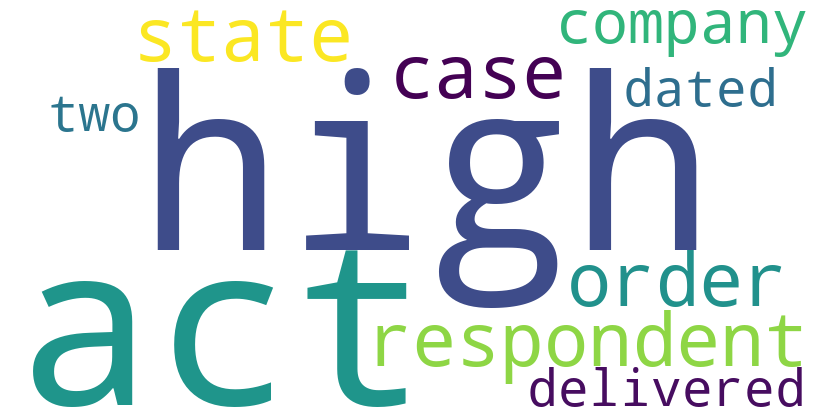

--------------------------


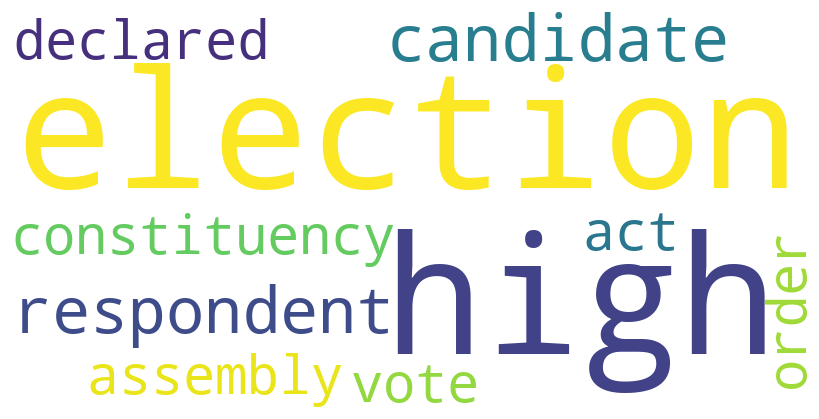

--------------------------


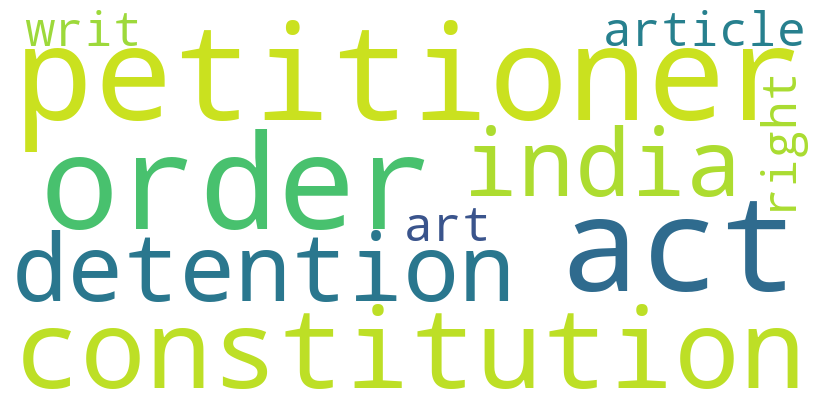

--------------------------


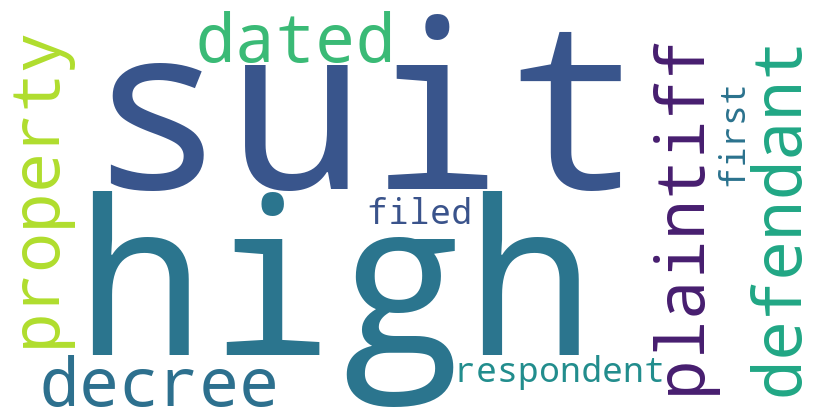

--------------------------


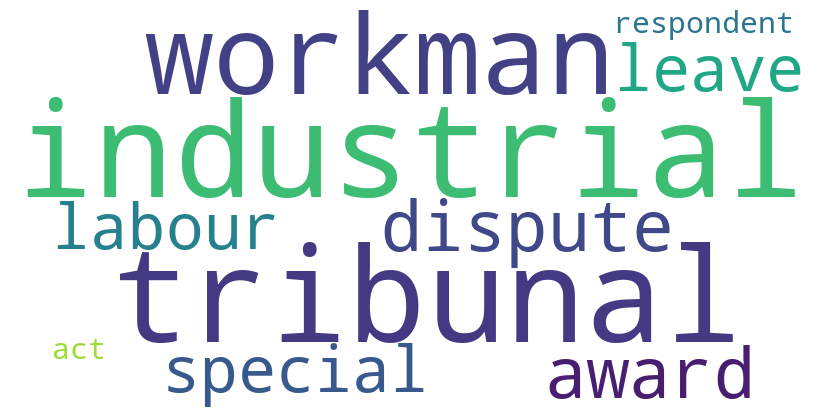

--------------------------


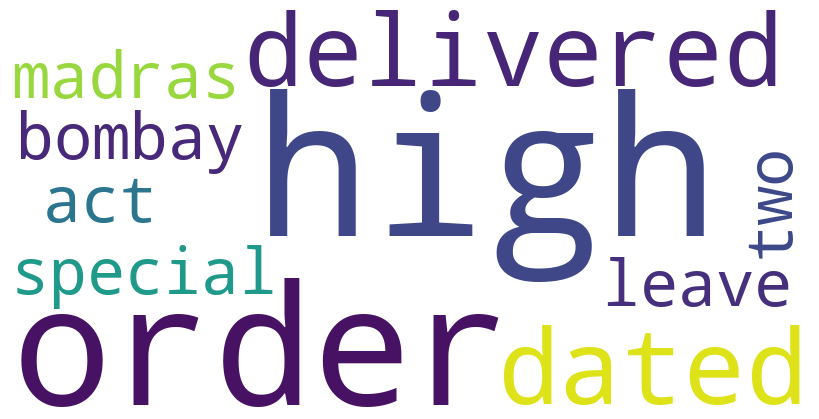

--------------------------


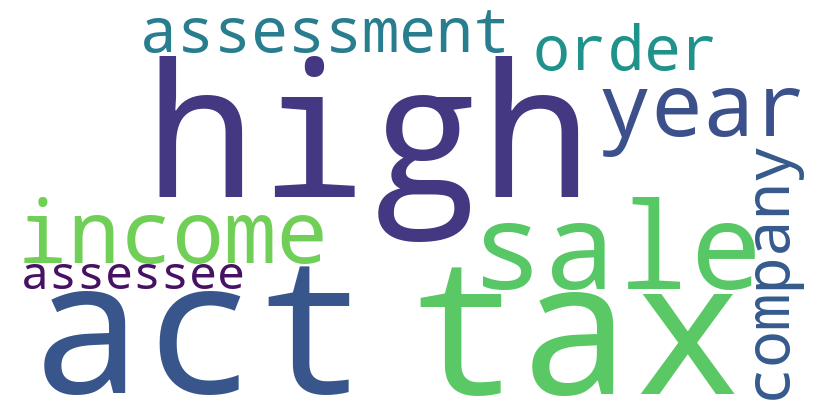

--------------------------


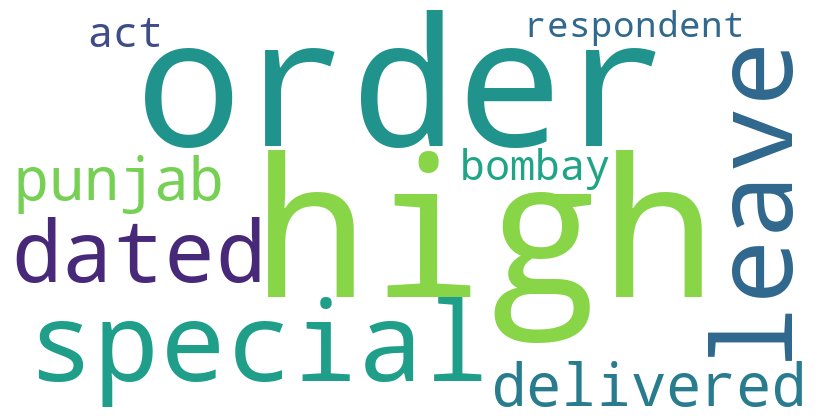

--------------------------


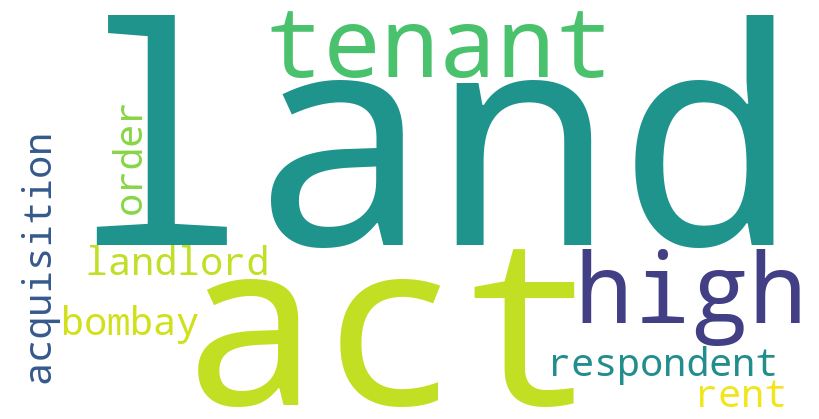

--------------------------


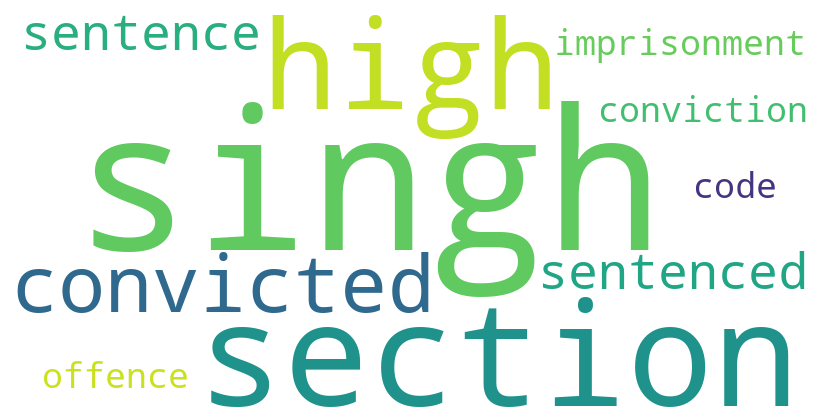

--------------------------


In [ ]:
km1.getTopKWordCloud()

# KMeans PIPELINE : Give the URL of Doc and get what you want

In [ ]:
class KMeans_Pipeline_Law(KMeans_lawRecc):
    def __init__(self):
        KMeans_lawRecc.__init__(self,data=new_data,no_of_clusters=10)

    def summarize_legal_document(self,url):
        # Retrieve the HTML content of the legal document
        response = requests.get(url)
        html_content = response.content
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract the main text content of the legal document
        main_content = soup.find("div", {"class": "judgments"})
        if main_content is None:
            return "Error: Could not find main content"
        paragraphs = main_content.find_all('p')
        text_content = ' '.join([p.text for p in paragraphs])
        if not text_content:
            return "Error: Could not extract text content"
        document_length = len(text_content)
        if document_length < 1000:
            max_length = 100
        elif document_length < 2000:
            max_length = 150
        elif document_length < 3000:
            max_length = 200
        else:
            max_length = 250
        # Use the Hugging Face Summarization pipeline to generate a summary
        summarization_pipeline = pipeline("summarization")
        try:
            summary = summarization_pipeline(text_content, max_length=max_length, min_length=30, do_sample=False, truncation=True)
        except ValueError as e:
            return f"Error: {e}"

        # Return the summary as a string
        return summary[0]['summary_text']

    def getSomethingSimilar(self,new_doc_url,what,no_of_doc=5):
        '''To get the Top X Documents similar to the test document
        ------------------------------------------------------------
        Arguments :

        no_of_doc : No of similar documents required. ( defualt = 5)

        what :
                1) "URL": (default) Prints the URL of the Closest document
                2) "Summary" : Prints the Summary of the Closest document
        '''
        new_doc_summary = self.summarize_legal_document(new_doc_url)
        self.predict_cluster(new_doc_summary)
        self.getTopXDoc(no_of_doc,what=what)



In [ ]:
kmeansPip = KMeans_Pipeline_Law()

C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
url = "https://indiankanoon.org/doc/1438487"

In [ ]:
kmeansPip.getSomethingSimilar(url,no_of_doc=5,what="URL")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 TARGET CLUSTER :  [8]
Top 5 nearest documents in cluster 8:
https://indiankanoon.org/doc/1438487
https://indiankanoon.org/doc/281123
https://indiankanoon.org/doc/1490310
https://indiankanoon.org/doc/502707
https://indiankanoon.org/doc/102512
https://indiankanoon.org/doc/846815


In [ ]:
kmeansPip.getSomethingSimilar(url,no_of_doc=5,what="Summary")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 TARGET CLUSTER :  [8]
Top 5 nearest documents in cluster 8:
---------------------
 Civil Appeal No. 458 of the 1965 Civil Appeal is Civil Appeal . Appeal was brought by the Allahabad High Court in SecondAppeal No. 1315 of 1958 . One Raj Kishore was possessed of sir and khudkasht lands, which on his death in 1923 devolved upon his widow Sanwari . The widow of a Hindu widow's estate received a gift of the bhumidhari lands in favour of her husband .
---------------------
 The property in dispute belonged to Wadhawa Singh, the father of  the respondent . The widow of the respondent made a gift of the property in favour of her daughter, the respondent, in April, 1933 . After coming into force of the Hindu Succession Act on 17-6-1956 the widow again gave the same lands to the respondent again . She died in 1963 and the appeal was heard in the Punjab and Haryana High Court .
---------------------
 The suit out of which this appeal arises concerns the right to certain plots of land in . The l

In [ ]:
kmeansPip.getTopKWords()


Top 10 words for Cluster 0:
high (128.21)
act (80.85)
respondent (79.61)
order (67.77)
case (67.67)
state (64.49)
company (57.47)
delivered (49.65)
two (45.54)
dated (45.37)

Top 10 words for Cluster 1:
election (23.74)
high (15.05)
respondent (13.13)
candidate (10.19)
constituency (9.69)
vote (9.25)
declared (9.23)
assembly (8.78)
act (8.55)
order (7.77)

Top 10 words for Cluster 2:
petitioner (32.33)
order (28.69)
act (28.10)
constitution (27.24)
detention (25.57)
india (25.52)
article (21.72)
art (19.92)
right (19.21)
writ (18.84)

Top 10 words for Cluster 3:
suit (40.47)
high (36.67)
decree (36.33)
defendant (35.50)
plaintiff (30.63)
property (26.79)
dated (23.55)
respondent (21.37)
filed (19.51)
first (18.41)

Top 10 words for Cluster 4:
industrial (25.22)
tribunal (24.91)
workman (20.58)
dispute (20.51)
award (18.27)
special (15.99)
leave (15.95)
labour (14.38)
respondent (13.72)
act (13.29)

Top 10 words for Cluster 5:
high (30.08)
order (22.86)
dated (22.66)
delivered (18.87)


# ________________DBScan_______________

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


summaries = new_data['PreProcessedSummary'].tolist()
# create a TfidfVectorizer object to convert summaries into feature vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(summaries)

dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X)

new_doc_summ = vectorizer.transform([new_doc])
new_doc_summ


<1x16864 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# list of documents to be clustered
documents = new_data2['PreProcessedSummary'].tolist()
documents = new_data2['Summary'].tolist()


# create a TfidfVectorizer object to convert documents into feature vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# create a DBSCAN object and fit it to the data
dbscan = DBSCAN(eps=0.74, min_samples=5, metric='cosine')
dbscan.fit(X)

# print the cluster labels for each document
# for i, label in enumerate(dbscan.labels_):
#     print(f"Document {i}: Cluster {label}")


DBSCAN(eps=0.74, metric='cosine')

In [ ]:
new_data2['clusterDB'] = dbscan.labels_
new_data2['clusterDB'].nunique()

23

In [ ]:
new_data2['clusterDB'].value_counts()

 0     4359
-1     4335
 14       9
 1        9
 11       9
 17       9
 19       8
 4        8
 3        6
 2        6
 15       6
 13       6
 20       6
 10       5
 5        5
 21       5
 16       5
 8        4
 6        4
 9        4
 18       4
 12       4
 7        3
Name: clusterDB, dtype: int64

In [ ]:
cluster_labels = new_data2['clusterDB']
preprocessed_summaries = documents
all_stop_words= stopwords.words('english')+extra_stop_words
cluster_list = new_data2['clusterDB'].value_counts().index
# Get the indices of the documents belonging to each cluster
cluster_indices = [np.where(cluster_labels == i)[0] for i in cluster_list]
# Loop over each cluster
for i, indices in enumerate(cluster_indices):
    # Get the documents belonging to the current cluster
    cluster_documents = [preprocessed_summaries[index] for index in indices]
    #cluster_documents = [summaries[index] for index in indices]


    # Create a TF-IDF vectorizer and fit it on the documents belonging to the current cluster
    vectorizer = TfidfVectorizer(stop_words=all_stop_words)
    tfidf_matrix = vectorizer.fit_transform(cluster_documents)

    # Get the sum of the TF-IDF scores for each word across all the documents belonging to the current cluster
    word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
    sorted_word_indices = np.argsort(word_scores)[::-1]

    # Print the top 10 words for the current cluster
    print(f"\nTop 10 words for Cluster {i}:")
    feature_names = np.array(vectorizer.get_feature_names_out())
    for j in range(10):
        print(f"{feature_names[sorted_word_indices[j]]} ({word_scores[sorted_word_indices[j]]:.2f})")


Top 10 words for Cluster 0:
high (186.53)
act (128.99)
tax (122.52)
order (118.63)
income (100.94)
special (96.66)
dated (92.76)
leave (92.02)
appeals (83.13)
delivered (81.00)

Top 10 words for Cluster 1:
high (147.58)
order (86.61)
act (79.72)
respondent (75.48)
dated (73.81)
special (70.34)
leave (67.43)
case (66.20)
state (65.92)
rs (64.97)

Top 10 words for Cluster 2:
displaced (1.19)
act (0.75)
west (0.74)
compensation (0.72)
rule (0.72)
rules (0.70)
persons (0.69)
pakistan (0.69)
rehabilitation (0.63)
property (0.57)

Top 10 words for Cluster 3:
trade (1.29)
mark (1.15)
registered (1.04)
india (0.90)
registration (0.65)
high (0.64)
device (0.53)
respect (0.52)
ltd (0.51)
act (0.49)

Top 10 words for Cluster 4:
state (1.05)
colleges (0.92)
admission (0.92)
medical (0.91)
interview (0.73)
applied (0.70)
tamil (0.66)
nadu (0.66)
one (0.66)
petitioner (0.63)

Top 10 words for Cluster 5:
truck (1.33)
driver (1.04)
accident (0.75)
police (0.69)
deceased (0.60)
high (0.57)
road (0.55)

In [ ]:
# new_doc = "The husband and wife filed for divorce after married for so long"
# new_doc = "truck driver accident"
# new_doc = preprocess_summary(new_doc)
# print(new_doc)
# new_doc_vect = vectorizer.transform([new_doc])
# dbscan.fit_predict(new_doc_vect)

truck driver accident


array([-1], dtype=int64)

### Observation :

All cluster labels for DBScan is -1

To improve :

    Preprocessing your data: Sometimes, preprocessing your data can improve clustering results. For example, you can try removing stop words, stemming or lemmatizing the text, or using different text normalization techniques.

    Changing the feature representation: The choice of features can have a significant impact on clustering results. You can try using different feature representations, such as word embeddings, topic models, or other types of text features.

    Tuning other hyperparameters: In addition to eps and min_samples, DBSCAN has other hyperparameters that can be tuned, such as the distance metric used to measure similarity between data points. You can try experimenting with different distance metrics or other hyperparameters to see if it improves your clustering results.

    Trying a different clustering algorithm: If none of the above steps improve your clustering results, it may be worth trying a different clustering algorithm altogether. There are many clustering algorithms available, such as K-means, Hierarchical Clustering, Spectral Clustering, and others, each with their own strengths and weaknesses.